0. Import libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.15.0'

In [19]:
import pandas as pd
import numpy as np
import os
import cv2

1. Load data 

In [4]:
breed_data = pd.read_csv('./dog_data/labels.csv')
image_folder = "./dog_data/train/"

In [5]:
breed_data.tail()

id                     breed
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

In [6]:
#Number of different breed type
breed_data.breed.value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

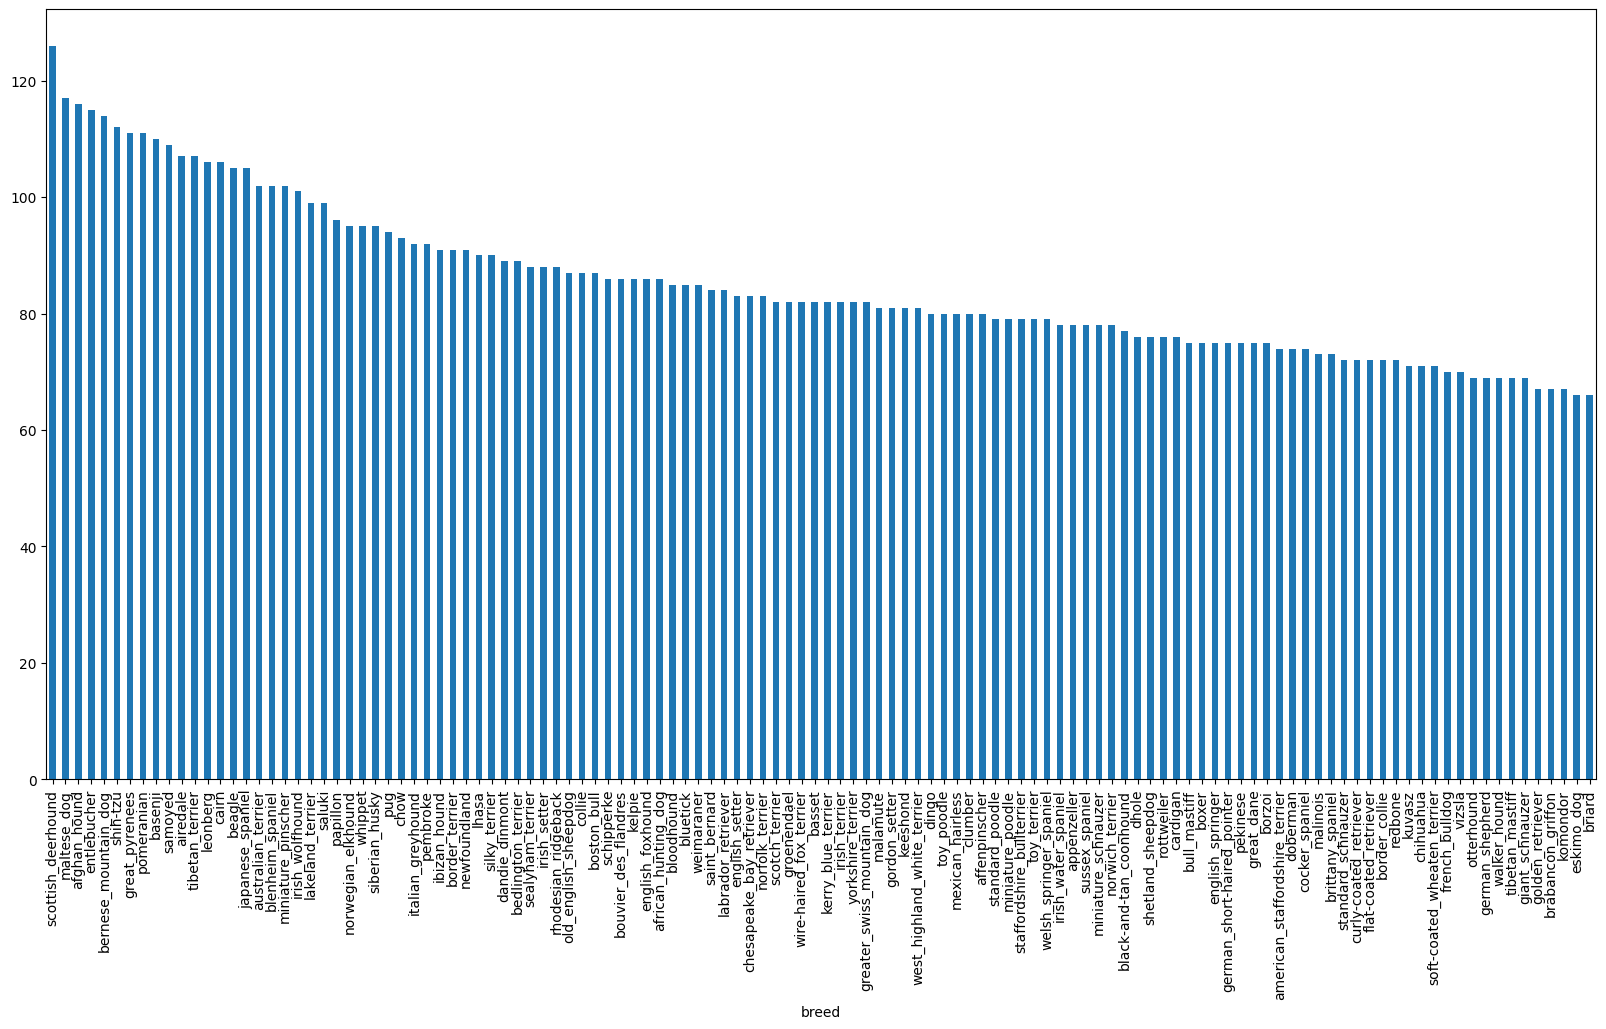

In [7]:
breed_data["breed"].value_counts().plot.bar(figsize=(20, 10));

2. Select representative varieties

In [8]:
#epresentative 20 breeds select
representative_breeds = [
    'airedale', 'dhole', 'bull_mastiff', 'redbone', 'silky_terrier',
    'flat-coated_retriever', 'chow', 'shetland_sheepdog', 'toy_terrier',
    'entlebucher', 'borzoi', 'malamute', 'irish_water_spaniel',
    'sealyham_terrier', 'english_foxhound', 'brittany_spaniel',
    'komondor', 'sussex_spaniel', 'kerry_blue_terrier', 'japanese_spaniel'
]

representative_breeds

['airedale',
 'dhole',
 'bull_mastiff',
 'redbone',
 'silky_terrier',
 'flat-coated_retriever',
 'chow',
 'shetland_sheepdog',
 'toy_terrier',
 'entlebucher',
 'borzoi',
 'malamute',
 'irish_water_spaniel',
 'sealyham_terrier',
 'english_foxhound',
 'brittany_spaniel',
 'komondor',
 'sussex_spaniel',
 'kerry_blue_terrier',
 'japanese_spaniel']

In [9]:
rep_breeds=breed_data[breed_data.breed.isin(representative_breeds)]
rep_breeds.shape # (column num, raw num)

(1668, 2)

In [10]:
#Number of different breed type
rep_breeds.breed.value_counts()

breed
entlebucher              115
airedale                 107
japanese_spaniel         105
chow                      93
silky_terrier             90
sealyham_terrier          88
english_foxhound          86
kerry_blue_terrier        82
malamute                  81
toy_terrier               79
sussex_spaniel            78
irish_water_spaniel       78
dhole                     76
shetland_sheepdog         76
borzoi                    75
bull_mastiff              75
brittany_spaniel          73
flat-coated_retriever     72
redbone                   72
komondor                  67
Name: count, dtype: int64

C:\Users\juneh\AppData\Local\Temp\ipykernel_4244\3440911122.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_counts = pd.value_counts(rep_breeds['breed'], ascending=True)


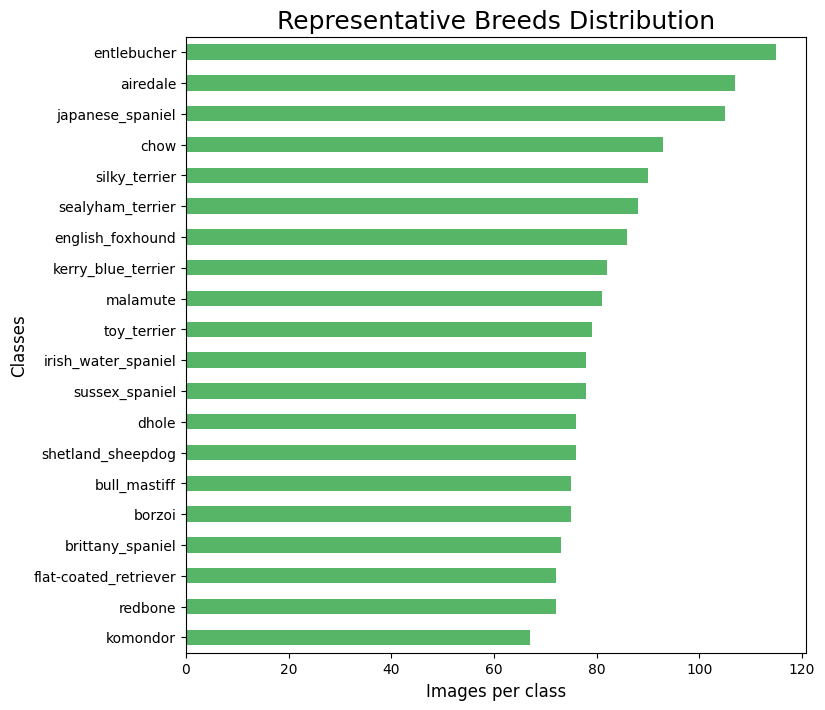

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

# Set a consistent blue color
class_color = sns.color_palette("Greens")[3]  # Adjust the index as needed

# Get the counts of images per class
class_counts = pd.value_counts(rep_breeds['breed'], ascending=True)

# Plot the bar chart with a consistent blue color
ax = class_counts.plot(kind='barh', fontsize="10", title="Representative Breeds Distribution", figsize=(8, 8), color=class_color)
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.title.set_size(18)
plt.show()


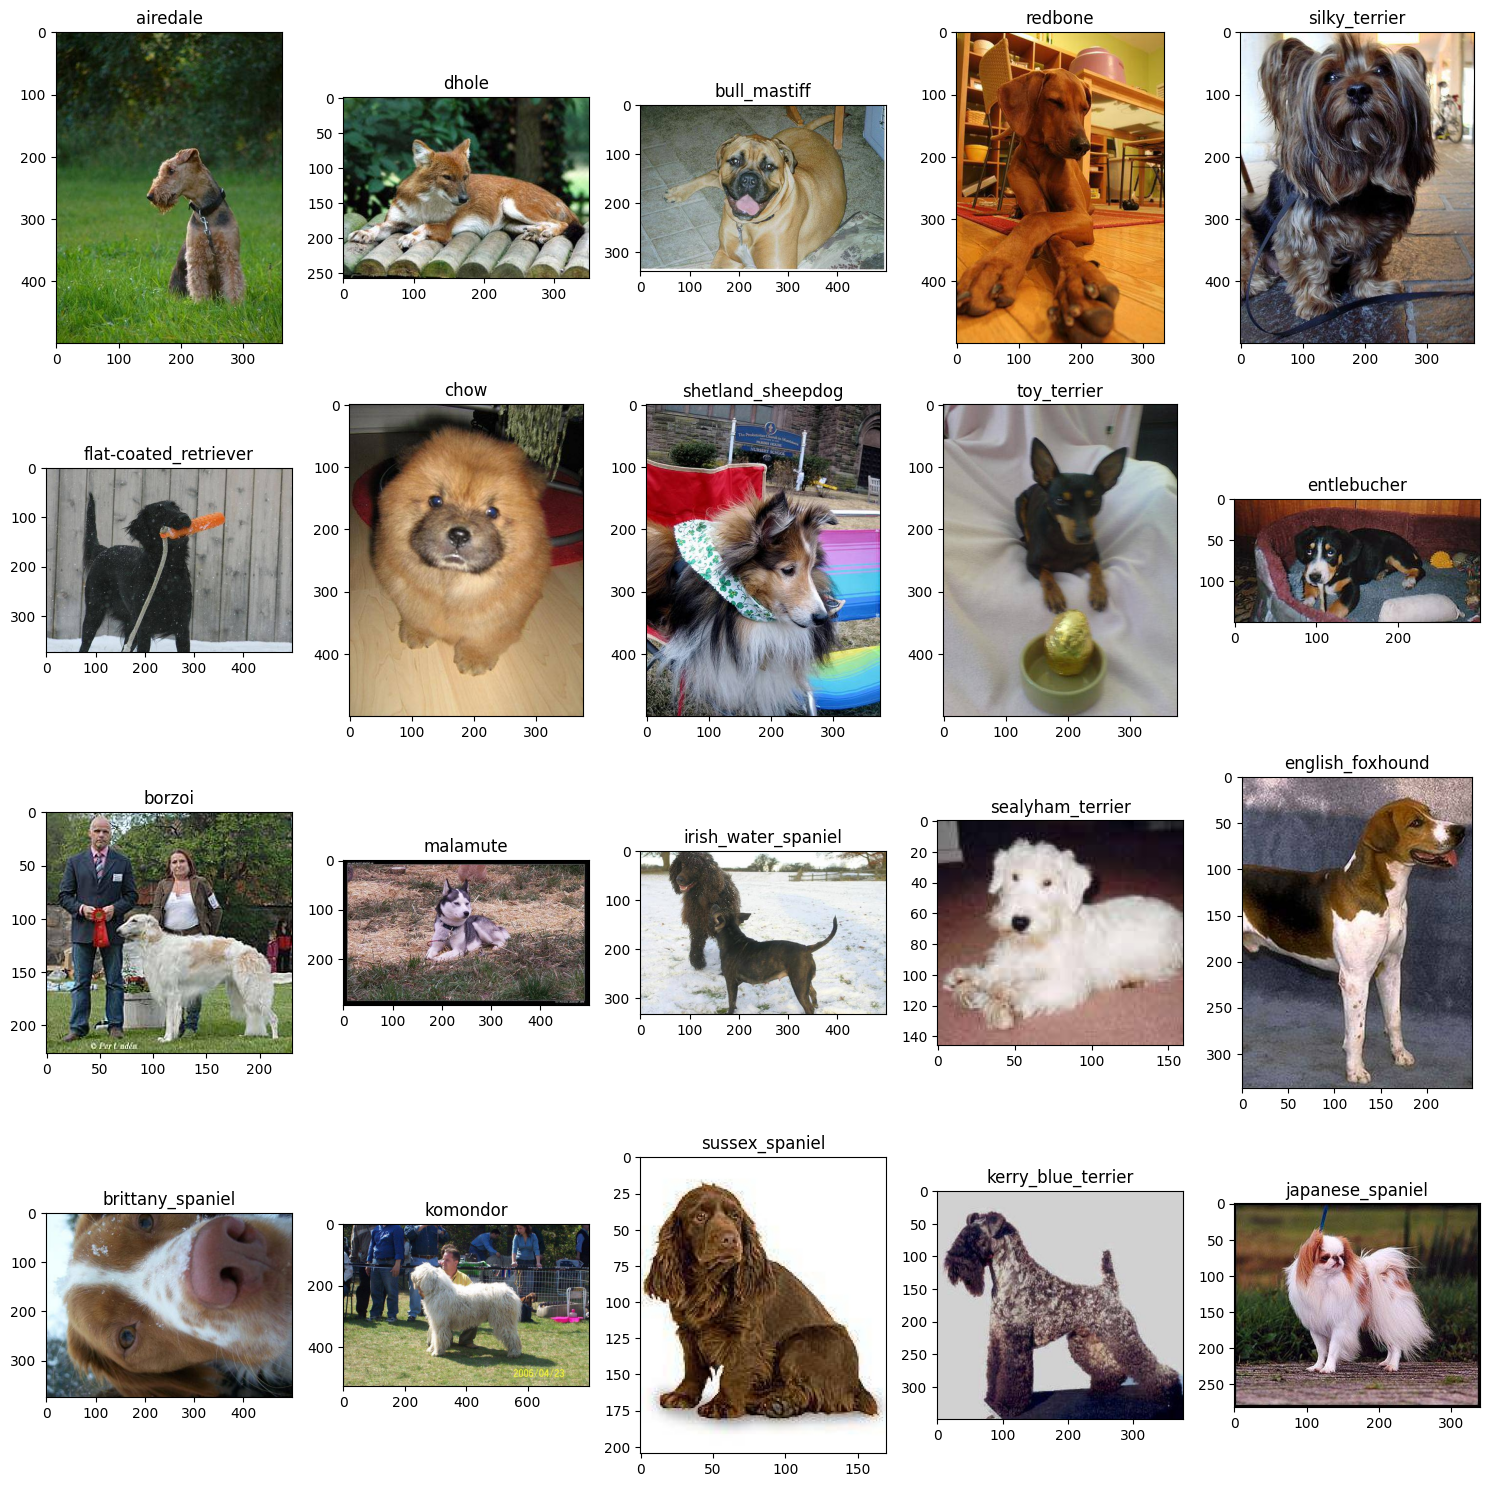

In [15]:
nrow = 4
ncol = 5
fig, ax = plt.subplots(nrow, ncol, figsize=(15, 15))

# Extracting image paths and breeds for the representative breeds
representative_breeds_list = representative_breeds

# Displaying images for each representative breed
for i, breed in enumerate(representative_breeds_list):
    # Getting one image for each breed
    img_id = rep_breeds[rep_breeds['breed'] == breed]['id'].iloc[0]
    image_path = os.path.join(image_folder, f"{img_id}.jpg")

    # Reading and displaying the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    row = i // ncol
    col = i % ncol
    ax[row, col].imshow(image)
    ax[row, col].set_title(breed)
    # ax[row, col].axis("off")

plt.tight_layout()
plt.show()


3. Data preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder

num_breed = 20
image_size = 224
batch_size = 32
label_encoder = LabelEncoder()

In [17]:
breed=list(rep_breeds["breed"].value_counts().keys())
new=sorted(breed,reverse=True)[: num_breed]
rep20_breed=rep_breeds.query("breed in @new")
rep20_breed

id                breed
7      002a283a315af96eaea0e28e7163b21b               borzoi
10     004396df1acd0f1247b740ca2b14616e    shetland_sheepdog
17     007b8a07882822475a4ce6581e70b1f8              redbone
27     00b7d114bc5166a629a3cc03d9329120  irish_water_spaniel
41     011bd7fd7c036dbb243d0e37329c77b7  irish_water_spaniel
...                                 ...                  ...
10208  ffa6a8d29ce57eb760d0f182abada4bf     english_foxhound
10213  ffca1c97cea5fada05b8646998a5b788     english_foxhound
10215  ffcde16e7da0872c357fbc7e2168c05f             airedale
10217  ffd25009d635cfd16e793503ac5edef0               borzoi
10219  ffe2ca6c940cddfee68fa3cc6c63213f             airedale

[1668 rows x 2 columns]

In [18]:
# Create image_file row 
rep_breeds['image_file'] = rep20_breed['id'].apply(lambda x: x + ".jpg")
rep_breeds.head()

C:\Users\juneh\AppData\Local\Temp\ipykernel_4244\3753863720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rep_breeds['image_file'] = rep20_breed['id'].apply(lambda x: x + ".jpg")


id                breed  \
7   002a283a315af96eaea0e28e7163b21b               borzoi   
10  004396df1acd0f1247b740ca2b14616e    shetland_sheepdog   
17  007b8a07882822475a4ce6581e70b1f8              redbone   
27  00b7d114bc5166a629a3cc03d9329120  irish_water_spaniel   
41  011bd7fd7c036dbb243d0e37329c77b7  irish_water_spaniel   

                              image_file  
7   002a283a315af96eaea0e28e7163b21b.jpg  
10  004396df1acd0f1247b740ca2b14616e.jpg  
17  007b8a07882822475a4ce6581e70b1f8.jpg  
27  00b7d114bc5166a629a3cc03d9329120.jpg  
41  011bd7fd7c036dbb243d0e37329c77b7.jpg

In [20]:
from tensorflow.keras.applications.mobilenet import preprocess_input

train_data=np.zeros((len(rep_breeds),image_size,image_size,3),dtype="float32")
for i,img_id in enumerate(rep_breeds["image_file"]):
    img=cv2.resize(cv2.imread(image_folder+img_id,cv2.IMREAD_COLOR),((image_size,image_size)))
    img_array=preprocess_input(np.expand_dims(np.array(img[...,: : -1].astype(np.float32)).copy(),axis=0))
    train_data[i]=img_array

In [21]:
from tensorflow.keras.utils import to_categorical

label_data = label_encoder.fit_transform(rep_breeds["breed"].values)
# to_categorical 함수는 이전 단계에서 얻은 숫자 레이블을 원-핫 인코딩된 벡터로 변환
label_data = to_categorical(label_data)

4. Data split

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data,label_data,test_size=0.2,random_state=42)

In [32]:
print("========================================")
print("Train Data Shape :",x_train.shape)
print("----------------------------------------")
print("Test Data Shape :",x_test.shape)
print("----------------------------------------")
print("Train Label Data Shape :",y_train.shape)
print("-----------------------------------------")
print("Test Label Data Shape :",y_test.shape)
print("=========================================")

Train Data Shape : (1334, 224, 224, 3)
----------------------------------------
Test Data Shape : (334, 224, 224, 3)
----------------------------------------
Train Label Data Shape : (1334, 20)
-----------------------------------------
Test Label Data Shape : (334, 20)


5. Data Augmentation(데이터 증강)

In [24]:
# TensorFlow의 Keras API를 사용하여 이미지 데이터에 데이터 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    ## 추가
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

# rotation_range: 무작위 회전 각도 범위 (0~45도).
# width_shift_range 및 height_shift_range: 무작위 수평 및 수직 이동 범위 (전체 너비 또는 높이에 대한 비율).
# shear_range: 무작위 전단 강도.
# zoom_range: 무작위 확대/축소 범위.
# horizontal_flip: 수평 뒤집기 여부.
# fill_mode: 회전 또는 이동 후 채울 픽셀의 전략 (가장 가까운 이웃, 상수 값, 또는 반사).

training_set=train_datagen.flow(x_train,y=y_train,batch_size=128)
testing_set=test_datagen.flow(x_test,y=y_test,batch_size=128)

Building the CNN

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Initialising the CNN
cnn = Sequential()

# Step 1 - Convolution
cnn.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
cnn.add(BatchNormalization())
# Step 2 - Pooling
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# Adding a second convolutional layer
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# Adding a third convolutional layer
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# Adding a fourth convolutional layer
cnn.add(Conv2D(256, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full Connection
cnn.add(Dense(units=512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

# Step 5 - Output Layer
cnn.add(Dense(units=20, activation='softmax'))

# Part 3 - Training the CNN
# Compiling the CNN
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)     

In [46]:
# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = testing_set, epochs = 25)

Epoch 1/25
11/11 [==============================] - 56s 5s/step - loss: 3.8816 - accuracy: 0.0937 - val_loss: 5.7298 - val_accuracy: 0.0778
Epoch 2/25
11/11 [==============================] - 48s 4s/step - loss: 3.3520 - accuracy: 0.1214 - val_loss: 10.8907 - val_accuracy: 0.0778
Epoch 3/25
11/11 [==============================] - 48s 4s/step - loss: 3.1934 - accuracy: 0.1612 - val_loss: 13.7944 - val_accuracy: 0.0778
Epoch 4/25
11/11 [==============================] - 48s 4s/step - loss: 3.1092 - accuracy: 0.1657 - val_loss: 14.4172 - val_accuracy: 0.0778
Epoch 5/25
11/11 [==============================] - 48s 4s/step - loss: 3.0063 - accuracy: 0.1589 - val_loss: 14.4212 - val_accuracy: 0.0539
Epoch 6/25
11/11 [==============================] - 48s 4s/step - loss: 2.9710 - accuracy: 0.1777 - val_loss: 17.8885 - val_accuracy: 0.0539
Epoch 7/25
11/11 [==============================] - 48s 4s/step - loss: 2.8652 - accuracy: 0.2084 - val_loss: 20.1721 - val_accuracy: 0.0359
Epoch 8/25
11/

6. Model training

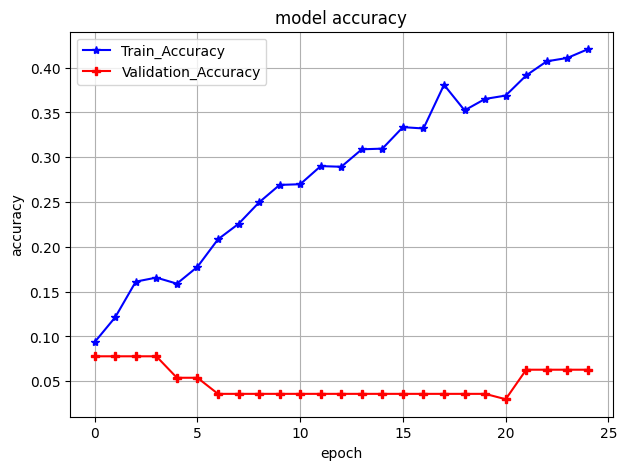

In [47]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],label="Train_Accuracy",color="blue",marker="*")
plt.plot(history.history['val_accuracy'],label="Validation_Accuracy",color="red",marker="P")
plt.grid(True)
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

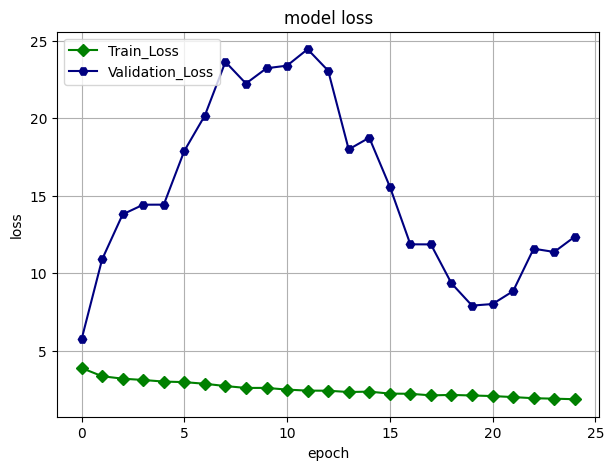

In [48]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],color="green",marker="D")
plt.plot(history.history['val_loss'],color="navy",marker="H")
plt.grid(True)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train_Loss', 'Validation_Loss'], loc='upper left')
plt.show()

In [49]:
lab = rep_breeds["breed"].unique().tolist()
print(lab)

['borzoi', 'shetland_sheepdog', 'redbone', 'irish_water_spaniel', 'dhole', 'brittany_spaniel', 'entlebucher', 'malamute', 'komondor', 'airedale', 'bull_mastiff', 'toy_terrier', 'chow', 'flat-coated_retriever', 'english_foxhound', 'kerry_blue_terrier', 'sealyham_terrier', 'japanese_spaniel', 'silky_terrier', 'sussex_spaniel']


In [50]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Input
from tensorflow.keras.models import Model

def get_features(model_name, model_preprocessor, input_size, data):
    input_layer = Input(input_size)
    preprocessor = model_preprocessor(input_layer)
    base_model = model_name(weights='imagenet', include_top=False, input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs=input_layer, outputs=avg)
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape:', feature_maps.shape)
    return feature_maps

In [51]:
from tensorflow.keras.applications import ResNet50

resnet_preprocessor = tf.keras.applications.resnet50.preprocess_input
resnet_features = get_features(ResNet50, resnet_preprocessor, (224, 224, 3), train_data)

53/53 [==============================] - 78s 1s/step
Feature maps shape: (1668, 2048)


In [52]:
all_predictions = cnn.predict(resnet_features)
all_predicted_labels = np.argmax(all_predictions, axis=1)
true_labels = np.argmax(label_data, axis=1)

ValueError: in user code:

    File "c:\Users\juneh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\juneh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\juneh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\juneh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "c:\Users\juneh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\juneh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 2048)


In [53]:
from tensorflow.math import confusion_matrix

conf_matrix = confusion_matrix(true_labels, all_predicted_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=representative_breeds, yticklabels=representative_breeds)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

NameError: name 'true_labels' is not defined

In [ ]:
print(classification_report(true_labels,all_predicted_labels,target_names=lab))